In [4]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


R = 3  # Reward for mutual cooperation
P = 1  # Punishment for mutual defection
S = 0  # Sucker's payoff
T = 5  # Temptation to defect


def always_cooperate(history, opponent_history):
    return "C"


def always_defect(history, opponent_history):
    return "D"


def tit_for_tat(history, opponent_history):
    # don't be an ass unless they're being one.
    if not opponent_history:
        return "C"
    return opponent_history[-1]


def tit_for_two_tats(history, opponent_history):
    if (
        len(opponent_history) >= 2
        and opponent_history[-1] == "D"
        and opponent_history[-2] == "D"
    ):
        return "D"
    return "C"


def random_choice(history, opponent_history):
    # pick whatever
    return random.choice(["C", "D"])


def grudger(history, opponent_history):
    if "D" in opponent_history:
        return "D"
    return "C"


def pavlov(history, opponent_history):
    if not history:
        return "C"
    if history[-1] == opponent_history[-1]:
        return history[-1]
    return "D" if history[-1] == "C" else "C"


def suspicious_tit_for_tat(history, opponent_history):
    if not opponent_history:
        return "D"
    return opponent_history[-1]


def generous_tit_for_tat(history, opponent_history):
    if not opponent_history:
        return "C"
    if opponent_history[-1] == "D" and random.random() < 0.10:
        return "C"
    return opponent_history[-1]


def probabilistic_tit_for_tat(history, opponent_history):
    if not opponent_history:
        return "C"
    if random.random() < 0.05:
        return "D"
    return opponent_history[-1]


def score(choice1, choice2):
    if choice1 == "C" and choice2 == "C":
        return R, R
    elif choice1 == "C" and choice2 == "D":
        return S, T
    elif choice1 == "D" and choice2 == "C":
        return T, S
    elif choice1 == "D" and choice2 == "D":
        return P, P


def simulate_game(strategy1, strategy2, rounds=10):
    history1, history2 = [], []
    score1, score2 = 0, 0

    for _ in range(rounds):
        choice1 = strategy1(history1, history2)
        choice2 = strategy2(history2, history1)

        history1.append(choice1)
        history2.append(choice2)

        sc1, sc2 = score(choice1, choice2)
        score1 += sc1
        score2 += sc2

    return score1, score2


strategy_names = [
    "Always Cooperate",
    "Always Defect",
    "Tit for Tat",
    "Tit for Two Tats",
    "Random",
    "Grudger",
    "Pavlov",
    "Suspicious Tit for Tat",
    "Generous Tit for Tat",
    "Probabilistic Tit for Tat",
]

strategies = [
    always_cooperate,
    always_defect,
    tit_for_tat,
    tit_for_two_tats,
    random_choice,
    grudger,
    pavlov,
    suspicious_tit_for_tat,
    generous_tit_for_tat,
    probabilistic_tit_for_tat,
]


results = pd.DataFrame(0, index=strategy_names, columns=strategy_names)

for i, strat1 in enumerate(strategies):
    for j, strat2 in enumerate(strategies):
        score1, score2 = simulate_game(strat1, strat2, 10)
        results.at[strategy_names[i], strategy_names[j]] = score1
        results.at[strategy_names[j], strategy_names[i]] += score2

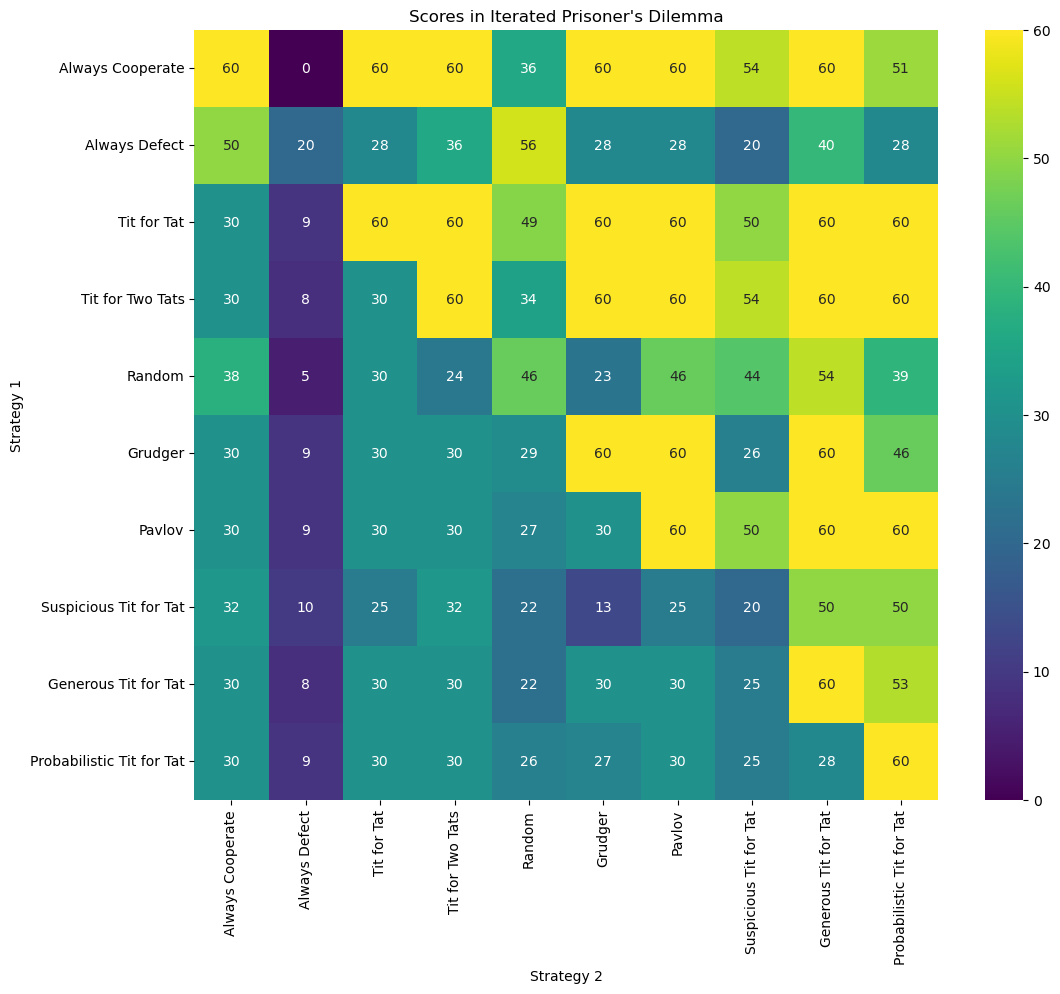

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(results, annot=True, cmap="viridis", fmt="d")
plt.title("Scores in Iterated Prisoner's Dilemma")
plt.ylabel("Strategy 1")
plt.xlabel("Strategy 2")
plt.show()

In [5]:
overall_scores = results.sum(axis=1)
print(overall_scores.sort_values(ascending=False))

Always Cooperate             501
Tit for Tat                  498
Tit for Two Tats             456
Pavlov                       386
Grudger                      380
Random                       349
Always Defect                334
Generous Tit for Tat         318
Probabilistic Tit for Tat    295
Suspicious Tit for Tat       279
dtype: int64


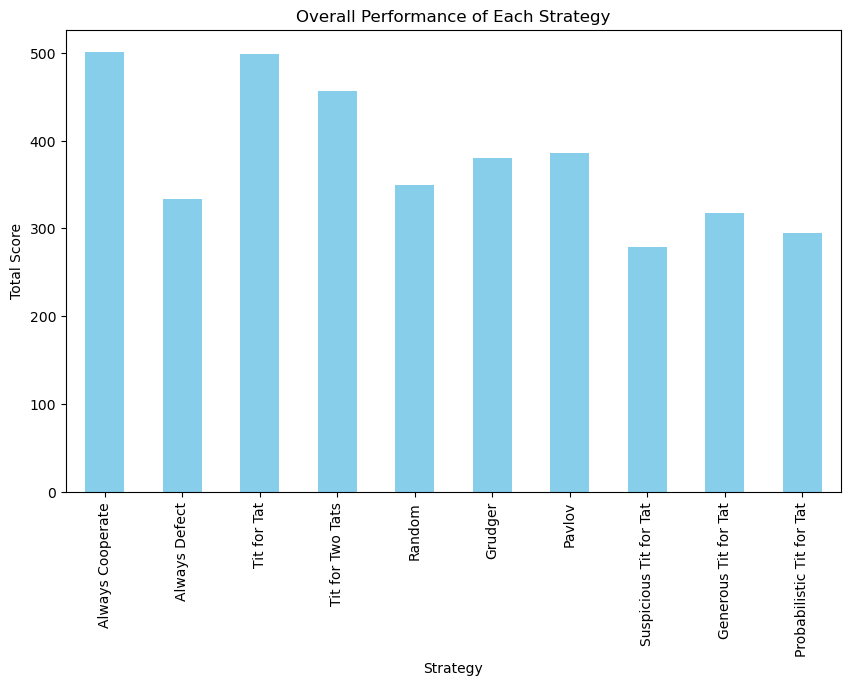

In [6]:
plt.figure(figsize=(10, 6))
overall_scores.plot(kind="bar", color="skyblue")
plt.title("Overall Performance of Each Strategy")
plt.ylabel("Total Score")
plt.xlabel("Strategy")
plt.show()